import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetic_preprocessed_data.csv")

In [3]:
df

,Unnamed: 0,encounter_id,patient_nbr,age,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,...,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory,readmitted
0,0,2278392,8222157,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,149190,55629189,15,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,64410,86047875,25,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,500364,82442376,35,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,16680,42519267,45,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101761,443847548,100162476,75,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
101762,101762,443847782,74694222,85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
101763,101763,443854148,41088789,75,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
101764,101764,443857166,31693671,85,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 83 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Unnamed: 0                101766 non-null  int64
 1   encounter_id              101766 non-null  int64
 2   patient_nbr               101766 non-null  int64
 3   age                       101766 non-null  int64
 4   race_?                    101766 non-null  int64
 5   race_AfricanAmerican      101766 non-null  int64
 6   race_Asian                101766 non-null  int64
 7   race_Caucasian            101766 non-null  int64
 8   race_Hispanic             101766 non-null  int64
 9   race_Other                101766 non-null  int64
 10  gender_Female             101766 non-null  int64
 11  gender_Male               101766 non-null  int64
 12  gender_Unknown/Invalid    101766 non-null  int64
 13  admission_type_id         101766 non-null  int64
 14  discharge_dispositio

In [5]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest classifer**

In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

Accuracy: 0.8879335757099341
Precision: 0.5769230769230769
Recall: 0.006564551422319475
F1 Score: 0.012981393336218087
AUC: 0.5029778869790772


**Bagging classifier**

In [7]:
# Initialize lists to store the evaluation metrics for different numbers of models
num_models_list = list(range(1, 11))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for num_models in num_models_list:
    # Create a Bagging classifier with the specified number of models (Random Forest classifiers)
    base_model = RandomForestClassifier(n_estimators=100, random_state=42)
    bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=num_models, random_state=42)

    # Train the Bagging model
    bagging_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = bagging_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

# Print the evaluation metrics for different numbers of models
print("Number of Models | Accuracy | Precision | Recall | F1 Score | AUC")
print("-" * 65)
for i in range(len(num_models_list)):
    print(f"{num_models_list[i]:<16} | {accuracy_list[i]:<8.4f} | {precision_list[i]:<9.4f} | {recall_list[i]:<6.4f} | {f1_list[i]:<8.4f} | {auc_list[i]:<4.4f}")


Number of Models | Accuracy | Precision | Recall | F1 Score | AUC
-----------------------------------------------------------------
1                | 0.8881   | 0.7059    | 0.0053 | 0.0104   | 0.5025
2                | 0.8881   | 0.7333    | 0.0048 | 0.0096   | 0.5023
3                | 0.8879   | 0.5789    | 0.0048 | 0.0095   | 0.5022
4                | 0.8880   | 0.6364    | 0.0061 | 0.0121   | 0.5028
5                | 0.8879   | 0.5789    | 0.0048 | 0.0095   | 0.5022
6                | 0.8880   | 0.6500    | 0.0057 | 0.0113   | 0.5027
7                | 0.8879   | 0.6000    | 0.0053 | 0.0104   | 0.5024
8                | 0.8878   | 0.5625    | 0.0039 | 0.0078   | 0.5018
9                | 0.8879   | 0.5789    | 0.0048 | 0.0095   | 0.5022
10               | 0.8879   | 0.6111    | 0.0048 | 0.0096   | 0.5022


**AdaBoost classifier**

In [8]:
# Initialize lists to store the evaluation metrics for different numbers of models
num_models_list = list(range(1, 11))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for num_models in num_models_list:
    # Create an AdaBoost classifier with the specified number of models (Random Forest classifiers)
    base_model = RandomForestClassifier(n_estimators=100, random_state=42)
    boosting_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=num_models, random_state=42)

    # Train the Boosting model
    boosting_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = boosting_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

# Print the evaluation metrics for different numbers of models
print("Number of Models | Accuracy | Precision | Recall | F1 Score | AUC")
print("-" * 65)
for i in range(len(num_models_list)):
    print(f"{num_models_list[i]:<16} | {accuracy_list[i]:<8.4f} | {precision_list[i]:<9.4f} | {recall_list[i]:<6.4f} | {f1_list[i]:<8.4f} | {auc_list[i]:<4.4f}")


Number of Models | Accuracy | Precision | Recall | F1 Score | AUC
-----------------------------------------------------------------
1                | 0.8877   | 0.4839    | 0.0066 | 0.0130   | 0.5028
2                | 0.8877   | 0.5000    | 0.0048 | 0.0095   | 0.5021
3                | 0.8878   | 0.5833    | 0.0031 | 0.0061   | 0.5014
4                | 0.8879   | 0.7000    | 0.0031 | 0.0061   | 0.5014
5                | 0.8878   | 0.6250    | 0.0022 | 0.0044   | 0.5010
6                | 0.8878   | 0.6250    | 0.0022 | 0.0044   | 0.5010
7                | 0.8878   | 0.6250    | 0.0022 | 0.0044   | 0.5010
8                | 0.8878   | 0.5714    | 0.0018 | 0.0035   | 0.5008
9                | 0.8878   | 0.6667    | 0.0018 | 0.0035   | 0.5008
10               | 0.8879   | 0.7143    | 0.0022 | 0.0044   | 0.5010


**Hyperparameter tuning of AdaBoost classifier**

Best Hyperparameters: {'base_estimator__max_depth': 7, 'base_estimator__min_samples_split': 3, 'n_estimators': 7}
Accuracy: 0.8880318364940553
F1 Score: 0.012992637505413598
Precision: 0.625
Recall: 0.006564551422319475


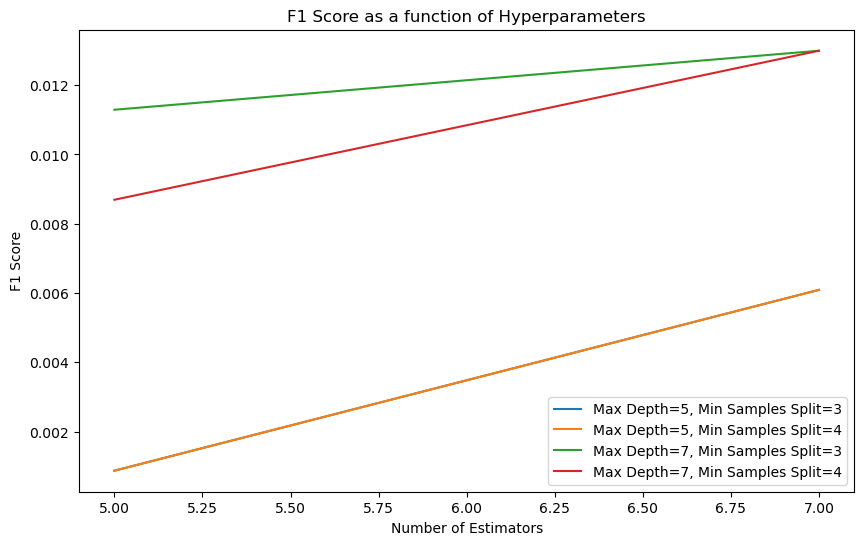

In [9]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5, 7],  # Number of base estimators
    'base_estimator__max_depth': [5, 7],  # Max depth of the base estimator (Random Forest)
    'base_estimator__min_samples_split': [3, 4]  # Min samples required to split in the base estimator
}

# Initialize the AdaBoost classifier with Random Forest as the base estimator
base_estimator = RandomForestClassifier(random_state=42)
boosting = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(boosting, param_grid, scoring='f1', cv=4)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the performance graph
# Define the hyperparameter values
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['base_estimator__max_depth']
min_samples_split_values = param_grid['base_estimator__min_samples_split']

# Initialize lists to store F1 scores
f1_scores = []

# Iterate over the hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Train the model and make predictions
            boosting.set_params(n_estimators=n_estimators,
                                base_estimator__max_depth=max_depth,
                                base_estimator__min_samples_split=min_samples_split)
            boosting.fit(X_train, y_train)
            y_pred = boosting.predict(X_test)

            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred)

            # Append the F1 score to the list
            f1_scores.append(f1)

# Reshape the F1 scores to match the hyperparameter grid
f1_scores = np.array(f1_scores).reshape(len(n_estimators_values), len(max_depth_values), len(min_samples_split_values))

# Plot the line graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot lines for each max_depth value
for i, max_depth in enumerate(max_depth_values):
    for j, min_samples_split in enumerate(min_samples_split_values):
        ax.plot(n_estimators_values, f1_scores[:, i, j], label=f"Max Depth={max_depth}, Min Samples Split={min_samples_split}")

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score as a function of Hyperparameters')
ax.legend()
plt.show()


**Hyperparameter tuning of Bagging classifier**

Best Hyperparameters: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 3, 'n_estimators': 5}
Accuracy: 0.887737054141692
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


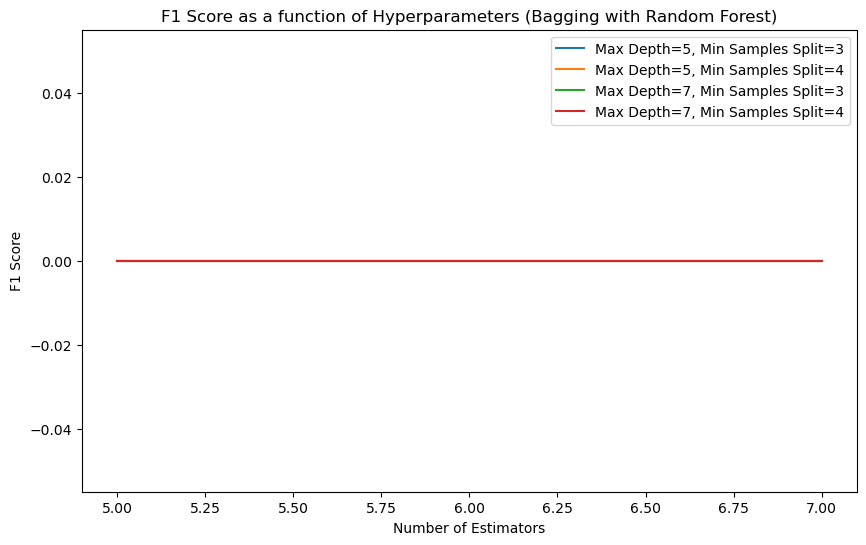

In [10]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5, 7],  # Number of base estimators
    'base_estimator__max_depth': [5, 7],  # Max depth of the base estimator (Random Forest)
    'base_estimator__min_samples_split': [3, 4]  # Min samples required to split in the base estimator
}

# Initialize the Bagging classifier with Random Forest as the base estimator
base_estimator = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(bagging, param_grid, scoring='f1', cv=4)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the performance graph
# Define the hyperparameter values
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['base_estimator__max_depth']
min_samples_split_values = param_grid['base_estimator__min_samples_split']

# Initialize lists to store F1 scores
f1_scores = []

# Iterate over the hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Train the model and make predictions
            bagging.set_params(n_estimators=n_estimators,
                               base_estimator__max_depth=max_depth,
                               base_estimator__min_samples_split=min_samples_split)
            bagging.fit(X_train, y_train)
            y_pred = bagging.predict(X_test)

            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred)

            # Append the F1 score to the list
            f1_scores.append(f1)

# Reshape the F1 scores to match the hyperparameter grid
f1_scores = np.array(f1_scores).reshape(len(n_estimators_values), len(max_depth_values), len(min_samples_split_values))

# Plot the line graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot lines for each max_depth value
for i, max_depth in enumerate(max_depth_values):
    for j, min_samples_split in enumerate(min_samples_split_values):
        ax.plot(n_estimators_values, f1_scores[:, i, j], label=f"Max Depth={max_depth}, Min Samples Split={min_samples_split}")

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score as a function of Hyperparameters (Bagging with Random Forest)')
ax.legend()
plt.show()